In [73]:
import numpy as np  # library used for working with arrays
import pandas as pd # library used for data manipulation and analysis


import seaborn as sns # library for visualization
import matplotlib.pyplot as plt # library for visualization
%matplotlib inline


# to suppress warnings
import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm # library for logistic regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc


In [34]:
#read csv dataset

pima = pd.read_csv("diabetes.csv") # load and reads the csv file
pima


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [91]:
# Logistic Regression
# x_train, x_test, y_train, y_test = train_test_split(pima.iloc[:,0:8], pima.iloc[:,8], test_size=0.2, random_state=42)
x_train, y_train = pima.iloc[:,0:8], pima.iloc[:,8]
x_train = sm.add_constant(x_train)
model = sm.GLM(y_train, x_train, family=sm.families.Binomial())
results = model.fit()
print(results.summary())
pima.iloc[:,8].mean()


                 Generalized Linear Model Regression Results                  
Dep. Variable:                Outcome   No. Observations:                  768
Model:                            GLM   Df Residuals:                      759
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -361.72
Date:                Mon, 03 Jul 2023   Deviance:                       723.45
Time:                        16:12:23   Pearson chi2:                     836.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2964
Covariance Type:            nonrobust                                         
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

0.3489583333333333

In [79]:
# Testing Logistic Regression
predictions = results.predict(x_train)

array([[445,  55],
       [112, 156]])

In [95]:
binaryPreds = []
for pred in predictions:
    if pred >= 0.9:
        binaryPreds.append(1)
    else:
        binaryPreds.append(0)

array = []
for i in range(len(y_train)):
    array.append((y_train.iloc[i], binaryPreds[i]))

incorrect = 0
for i in array:
    if i[0]!=i[1]:
        incorrect += 1
print(1-(incorrect/len(array)))

cm = confusion_matrix(y_train, binaryPreds)
print(cm)

print((cm[0][0]+cm[1][1])/cm.sum())


0.67578125
[[496   4]
 [245  23]]
0.67578125


In [5]:
# finds the number of columns in the dataset
total_cols=len(pima.axes[1])
print("Number of Columns: "+str(total_cols))

Number of Columns: 9


In [6]:
pima.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
# finds the number of rows in the dataset
total_rows = len(pima.axes[0])
print("Number of Rows: "+str(total_rows))

Number of Rows: 768


In [8]:
print('The dimension of the DataFrame is: ', pima.ndim)

The dimension of the DataFrame is:  2


In [9]:
pima.size

6912

In [10]:
#The info() function is used to print a concise summary of a DataFrame.
#This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage.

pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [11]:
# checking for missing values (null)
#functions that return a boolean value indicating whether the passed in argument value is in fact missing data.
# this is an example of chaining methods

pima.isnull().values.any()

False

In [12]:
#it can also output if there is any missing values each of the columns

pima.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [13]:
#excludes the outcome column 
pima.iloc[:,0:8].describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


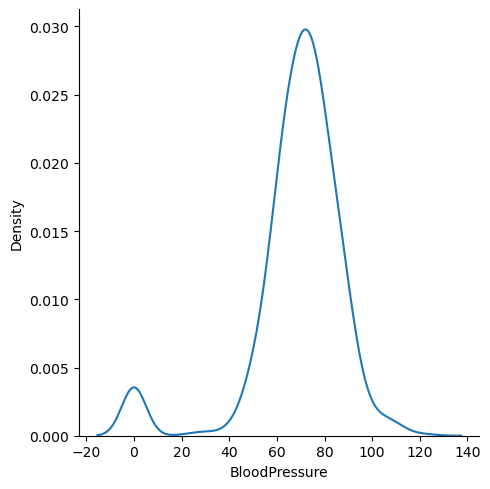

In [14]:
sns.displot(pima['BloodPressure'], kind='kde') 
plt.show() 

In [16]:
# What is the BMI of the person having the highest glucose?
pima[pima['Glucose']==pima['Glucose'].max()]['BMI']

661    42.9
Name: BMI, dtype: float64

In [30]:
# mean 
m1 = pima['BMI'].mean() 
print(m1) 

# median 
m2 = pima['BMI'].median() 
print(m2)

# mode  
m3 = pima['BMI'].mode()[0] 
print(m3)

NameError: name 'df' is not defined

In [18]:
# How many women's Glucose levels are above the mean level of Glucose 
# mean() method finds the mean of all numerical values in a series or column.
v1 = pima[pima['Glucose']>pima['Glucose'].mean()].shape[0]
print(v1)

# count the number of women that have their 'BloodPressure' equal to the median of 'BloodPressure' 
v2 = pima[pima['BloodPressure']==pima['BloodPressure'].median()].shape[0]
print(v2)

# and their 'BMI' less than the median of 'BMI'
v3 = pima[pima['BMI']<pima['BMI'].median()].shape[0]
print(v3)

349
44
373


In [19]:
pima1 = pima[(pima['BloodPressure']==pima['BloodPressure'].median()) & (pima['BMI']<pima['BMI'].median())]
number_of_women=len(pima1.axes[0])
print("Number of women:" +str(number_of_women))

Number of women:22


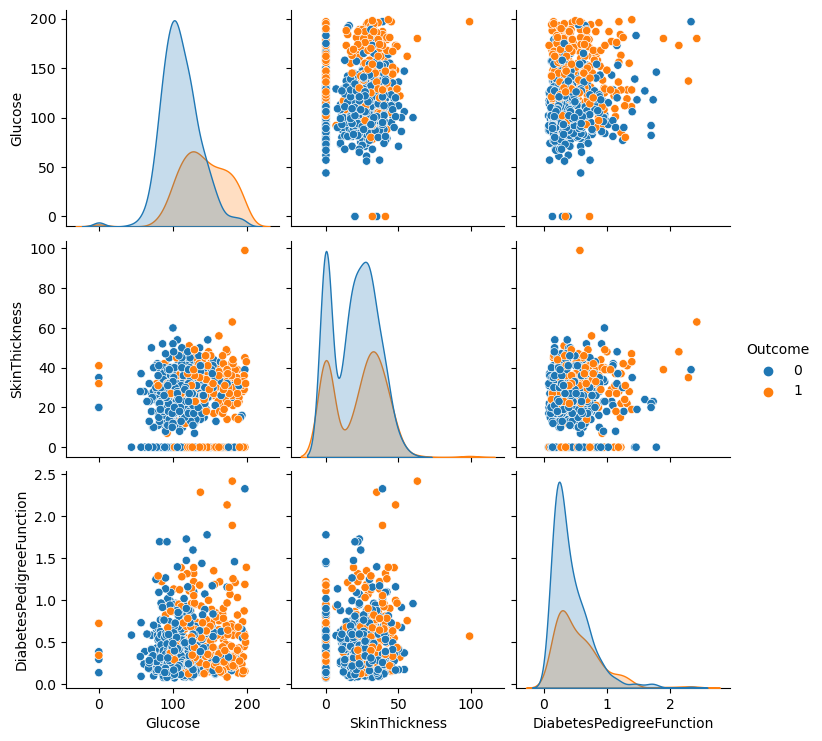

In [20]:
# Getting a pairwise distribution between Glucose, Skin thickness and Diabetes pedigree function.
sns.pairplot(data=pima,vars=['Glucose', 'SkinThickness', 'DiabetesPedigreeFunction'], hue = 'Outcome')
plt.show()

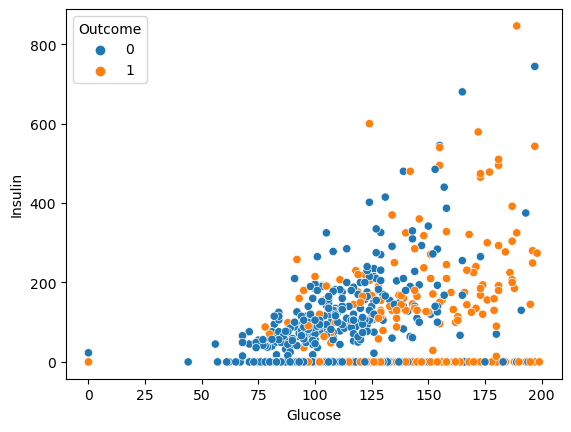

In [21]:
# Studying the correlation between glucose and insulin using a Scatter Plot.
sns.scatterplot(x='Glucose',y='Insulin',data=pima, hue = 'Outcome')
plt.show()

In [22]:
# The scatter plot above implies that mostly the increase in glucose does relatively little change in insulin levels 
# It also shows that in some the increase in glucose increases in insulin. 
# This could probably be outliers.

# Let us explore the possibility of outliers using the Box Plot.
# Boxplot is a way to visualize the five-number summary of the variable. 
# Boxplot gives information about the outliers in the data.

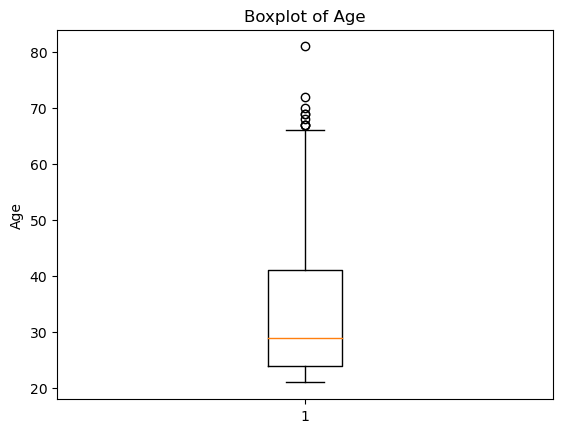

In [23]:
plt.boxplot(pima['Age'])

plt.title('Boxplot of Age')
plt.ylabel('Age')
plt.show()
# The box plot shows the presence of outliers above the horizontal line.

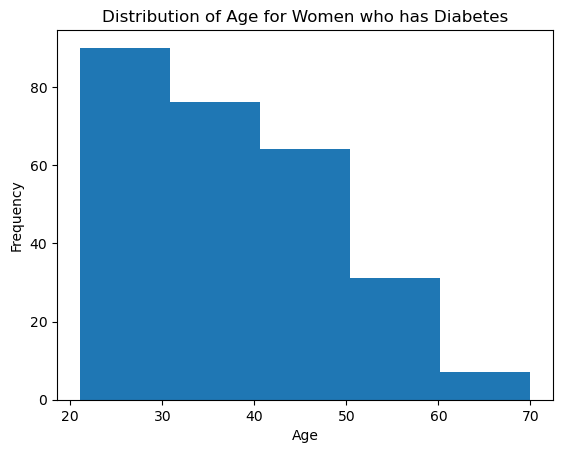

In [24]:
# Understanding the number of women in different age groups with diabetes.
plt.hist(pima[pima['Outcome']==1]['Age'], bins = 5)
plt.title('Distribution of Age for Women who has Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Of all the women with diabetes most are from the age between 22 to 30.
# The frequency of women with diabetes decreases as age increases.

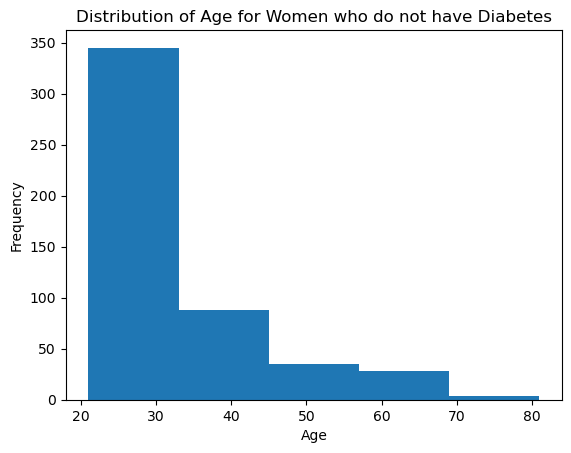

In [25]:
# understanding the number of women in different age groups without diabetes.

plt.hist(pima[pima['Outcome']==0]['Age'], bins = 5)
plt.title('Distribution of Age for Women who do not have Diabetes')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# The highest number of Women without diabetes range between ages 22 to 33.
# Women between the age of 22 to 35 are at the highest risk of diabetes 
# and also the is the highest number of those without diabetes.

In [26]:
# The IQR or Inter Quartile Range is a statistical measure for the variability in a given data.
# It is a methodology that is generally used to filter outliers in a dataset

Q1 = pima.quantile(0.25)
Q3 = pima.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64


In [27]:
# Correlation is a statistic that measures the degree to which two variables move with each other.
corr_matrix = pima.iloc[:,0:8].corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


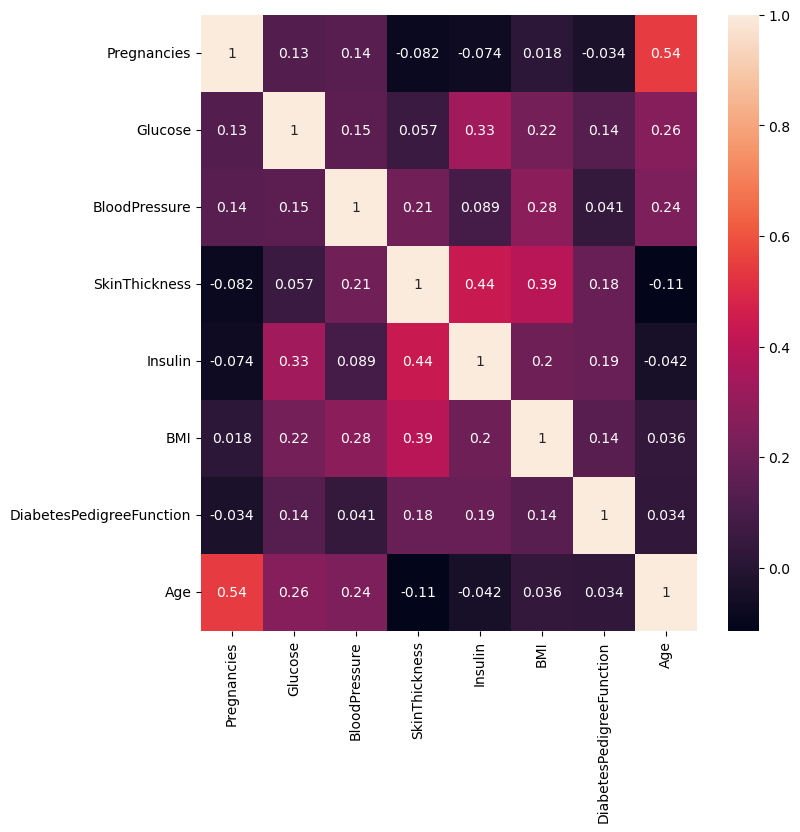

In [28]:
# 'annot=True' returns the correlation values
plt.figure(figsize=(8,8))
sns.heatmap(corr_matrix, annot = True)

# display the plot
plt.show()

In [29]:
# The closer the correlation is to 1, the more positively correlated they are; 
# that is as one increases so does the other and the closer to 1 the stronger this relationship is.
# A correlation closer to -1 is similar,
# but instead of both increasing one variable will decrease as the other increases.